## Multilayer neural network for Regression Problems 


In machine learning we can group the problems we like to solve into two groups based on the nature of the outputs: Regression Problems, where we like to predict a continuous-valued output, and classification problems where we like to determine to which category a given input belongs.


In [0]:
from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# you are going to define a feedforward network pretty in the same way you defined for classification problems - except no output 
# function (no activation function on the output layer) and you you need to have the proper cost function for regression. Can
# you remember what it was?

57344/57026 [==============================] - 0s 1us/step


In [0]:
# x_train[0]

Epoch 1/200
404/404 [==============================] - 2s 6ms/step - loss: 16.3770 - acc: 0.0000e+00
Epoch 2/200
404/404 [==============================] - 0s 1ms/step - loss: 6.8182 - acc: 0.0099
Epoch 3/200
404/404 [==============================] - 0s 1ms/step - loss: 6.0137 - acc: 0.0173
Epoch 4/200
404/404 [==============================] - 0s 1ms/step - loss: 5.8002 - acc: 0.0074
Epoch 5/200
404/404 [==============================] - 0s 1ms/step - loss: 5.4746 - acc: 0.0074
Epoch 6/200
404/404 [==============================] - 0s 1ms/step - loss: 5.3632 - acc: 0.0099
Epoch 7/200
404/404 [==============================] - 0s 1ms/step - loss: 5.2081 - acc: 0.0149
Epoch 8/200
404/404 [==============================] - 0s 1ms/step - loss: 5.0264 - acc: 0.0050
Epoch 9/200
404/404 [==============================] - 0s 1ms/step - loss: 5.0750 - acc: 0.0074
Epoch 10/200
404/404 [==============================] - 0s 1ms/step - loss: 5.0185 - acc: 0.0149
Epoch 11/200
404/404 [============

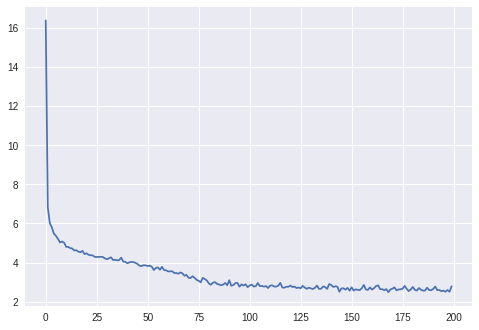

In [0]:
# y_train.shape
import matplotlib.pyplot as plt
# import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

model = Sequential()
model.add(Dense(units=13, activation='relu', kernel_initializer = 'normal',input_dim=13))
model.add(Dense(units=13, activation = 'relu', kernel_initializer = 'normal'))
model.add(Dense(units=1))
# model.add(Dense(units=1, activation='none', input_dim=10))

# sgd = optimizers.SGD(lr=0.001, momentum=0.1, nesterov=False)
model.compile(loss='mean_absolute_error', optimizer='adam',metrics = ['accuracy'])


history = model.fit(x_train, y_train, epochs=200, batch_size=5)

# plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.show()









The above graph shows the loss of the neural network on training data whici decreses while the training progresses.

In [0]:
loss_and_metrics = model.evaluate(x_test, y_test)
print(loss_and_metrics)


102/102 [==============================] - 0s 3ms/step
3.756025435877781


### Momentum

The method of momentum is a very popular and powerful optimization technique used in learning.  Momentum stands on the shoulders of the very capable gradient descent method, and on top of it, it improves multiple shortcomings of gradient descent. The method of momemntum is introduced to accelerate learning,  especially in the face of high curviture, small but consistent gradients, or noisy gradients.

The name momentum is derived from a physical analogy; consider the negative gradient of the cost function as the force. And consider the set of parameter values that we calculate during the training as a particle that is moving over the surface of the cost function according to this force.  In regular gradient descent the particle follows this gradient to find the minimum point. But there are problems. What if the cost function contours are not symmetrically scaled and they are narrower in some direction than others (poor conditioned)? 

![alt text](http://appliedai.wordpress.ncsu.edu/files/2018/11/Screen-Shot-2018-11-04-at-10.27.20-PM.png)

In such situation the optimization path (the path particle follows) oscillates wildly and it can take a long time to reach to a good minimum point. 
What if the gradient is very small in some surface areas of the cost function (plateau) or there is a local minimum? 

Momentum method helps us to overcome these challenges. In momentum method, in addition to the force (the negative gradient of the cost function), we assume the particle has a momentum as well, which is built over time based on the force (negative gradients). Consider momentum as the exponentially decaying moving average of past gradients. So momentum damps down the oscillations, and it allows the particle to pass through the plateaus and shallow local minimums. 







1


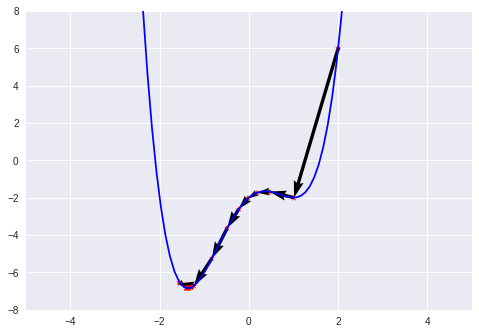

In [0]:
# This is SGD without momentum. Add momentum to this code and compare the performance
import matplotlib.pyplot as plt
import numpy as np

#this is where we define the function f. this functio nreturns back f(x)
def non_convex_f(z):
  return (z**4-3*z**2+2*z-2)

#this function returns back the derivative of the defined the function f at different values x, i.e. it returns back df/d(x) evaluated at x.

def d_non_convex_f(z):
  return(4*z**3-6*z+2)

alpha = 0.1  #step size (learning rate in context of machine learning)
n_iterations = 20

colors = plt.cm.jet(np.linspace(0,1,n_iterations))

np.random.seed(seed=1)
x = 2     #initial condition
trajectory=np.array([x])


plt.plot(x,non_convex_f(x),'k.')

precision=0.001
step_size=1
iteration=0
beta = 0.55
momentum = 0
print(step_size)

while (step_size > precision) & (iteration < n_iterations):
    momentum = beta*momentum + (1-beta)*d_non_convex_f(x)
    new_x=x-alpha*momentum
    step_size = abs(new_x - x)
    x=new_x
    plt.plot(x,d_non_convex_f(x))
    iteration=iteration+1
    trajectory=np.append(trajectory,x)

    

plt.plot(trajectory,non_convex_f(trajectory),'r*')
plt.quiver(trajectory[:-1], non_convex_f(trajectory)[:-1], trajectory[1:]-trajectory[:-1], non_convex_f(trajectory)[1:]-non_convex_f(trajectory)[:-1], scale_units='xy', angles='xy', scale=1)
plt.axis([-5, 5, -8, 8])
xx=np.linspace(-5,5,100)
yy=non_convex_f(xx)
plt.plot(xx,yy,'b')
plt.show()

In popular deep learning frameworks and libraries, you don't have to do any programing in order to implement momentum. Many of those built-in optimizers come with momentum, you just have to enable and set the hyperparameters of the momentum (if it is not done by default). For example, see "momentum" parameter for SGD technique in Keras:
https://keras.io/optimizers/#sgd

## Nesterov Momentum

Momentum tells us to which direction the particle is heading. In regular momentum method, we evaluate the gradient at the current location and updatet he momentum, and then step forward according to the momentum. But Nesterov tells us that why not evaluate the gradient ahead according to momentum (instead of evaluating at the current location), update the momentum with this looking ahead gradient, and then step forward. This gradual, but consistent improvement over the trajectory improves the performance. 

2 1.99937
1.99937 1.306806289975106
1.306806289975106 0.7732847431827493
0.7732847431827493 0.46205451813659676
0.46205451813659676 0.2778783790151213
0.2778783790151213 0.14866287245295098
0.14866287245295098 0.03194040740890135
0.03194040740890135 -0.09856211431287375
-0.09856211431287375 -0.2622863000331253
-0.2622863000331253 -0.47573113514379245
-0.47573113514379245 -0.7495484577517908
-0.7495484577517908 -1.0736577308891149
-1.0736577308891149 -1.3878240844253276
-1.3878240844253276 -1.5742463034396796
-1.5742463034396796 -1.560651206743455
-1.560651206743455 -1.431101662194552
-1.431101662194552 -1.3136613708333111
-1.3136613708333111 -1.2653147967076412
-1.2653147967076412 -1.2817506256248445
-1.2817506256248445 -1.3320292415311492


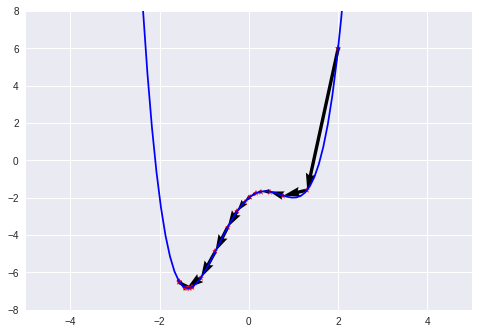

In [0]:
# add Nesterov Momentum to previous code


import matplotlib.pyplot as plt
import numpy as np

#this is where we define the function f. this functio nreturns back f(x)
def non_convex_f(z):
  return (z**4-3*z**2+2*z-2)

#this function returns back the derivative of the defined the function f at different values x, i.e. it returns back df/d(x) evaluated at x.

def d_non_convex_f(z):
  return(4*z**3-6*z+2)

alpha = 0.05  #step size (learning rate in context of machine learning)
n_iterations = 20

colors = plt.cm.jet(np.linspace(0,1,n_iterations))

np.random.seed(seed=1)
x = 2     #initial condition
trajectory=np.array([x])


plt.plot(x,non_convex_f(x),'k.')

precision=0.001
step_size=1
iteration=0
beta = 0.63
momentum = 0.001
# print(step_size)

while (step_size > precision) & (iteration < n_iterations):
#   in Nesterov momentum, the gradient of next x (or next weights) is taken instead of current x which helps in better momentum upgradation
    new_x=x-beta*momentum
    momentum = beta*momentum + alpha*d_non_convex_f(new_x)
    print(x, new_x)
#     step_size = abs(new_x - x)
    x=new_x
    plt.plot(x,d_non_convex_f(x))
    iteration=iteration+1
    trajectory=np.append(trajectory,x)

    

plt.plot(trajectory,non_convex_f(trajectory),'r*')
plt.quiver(trajectory[:-1], non_convex_f(trajectory)[:-1], trajectory[1:]-trajectory[:-1], non_convex_f(trajectory)[1:]-non_convex_f(trajectory)[:-1], scale_units='xy', angles='xy', scale=1)
plt.axis([-5, 5, -8, 8])
xx=np.linspace(-5,5,100)
yy=non_convex_f(xx)
plt.plot(xx,yy,'b')
plt.show()


In [0]:
from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# you are going to define a feedforward network pretty in the same way you defined for classification problems - except no output 
# function (no activation function on the output layer) and you you need to have the proper cost function for regression. Can
# you remember what it was?

## SGD vs. Adam Vs. RMSprop 

Try Adam and RMSprop for optimizing your model, and compare their speed against the regulat SGD.

Epoch 1/100
404/404 [==============================] - 0s 1ms/step - loss: 22.5021 - acc: 0.0000e+00
Epoch 2/100
404/404 [==============================] - 0s 315us/step - loss: 20.6563 - acc: 0.0000e+00
Epoch 3/100
404/404 [==============================] - 0s 299us/step - loss: 15.7520 - acc: 0.0000e+00
Epoch 4/100
404/404 [==============================] - 0s 253us/step - loss: 8.8919 - acc: 0.0050
Epoch 5/100
404/404 [==============================] - 0s 295us/step - loss: 7.8437 - acc: 0.0025
Epoch 6/100
404/404 [==============================] - 0s 267us/step - loss: 7.1675 - acc: 0.0050
Epoch 7/100
404/404 [==============================] - 0s 268us/step - loss: 6.6602 - acc: 0.0149
Epoch 8/100
404/404 [==============================] - 0s 279us/step - loss: 6.2632 - acc: 0.0124
Epoch 9/100
404/404 [==============================] - 0s 268us/step - loss: 6.0178 - acc: 0.0074
Epoch 10/100
404/404 [==============================] - 0s 273us/step - loss: 5.8684 - acc: 0.0050
Epoch 

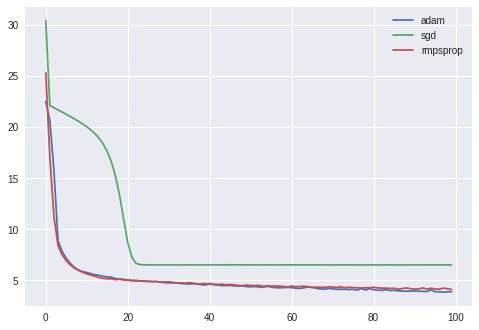

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import matplotlib.pyplot as plt

model1 = Sequential()
model1.add(Dense(units=13, activation='relu', kernel_initializer = 'normal',input_dim=13))
model1.add(Dense(units=7, activation = 'relu', kernel_initializer = 'normal'))
model1.add(Dense(units=1))
# model.add(Dense(units=1, activation='none', input_dim=10))

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model1.compile(loss='mean_absolute_error', optimizer=adam,metrics=['accuracy'])

model2 = Sequential()
model2.add(Dense(units=13, activation='relu', kernel_initializer = 'normal',input_dim=13))
model2.add(Dense(units=7, activation = 'relu', kernel_initializer = 'normal'))
model2.add(Dense(units=1))
# model.add(Dense(units=1, activation='none', input_dim=10))

# sgd = optimizers.SGD(lr=0.001, momentum=0.1, nesterov=False)
model2.compile(loss='mean_absolute_error', optimizer='sgd',metrics=['accuracy'])



model3 = Sequential()
model3.add(Dense(units=13, activation='relu', kernel_initializer = 'normal',input_dim=13))
model3.add(Dense(units=7, activation = 'relu', kernel_initializer = 'normal'))
model3.add(Dense(units=1))
# model.add(Dense(units=1, activation='none', input_dim=10))

rmsprop = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)

# sgd = optimizers.SGD(lr=0.001, momentum=0.1, nesterov=False)
model3.compile(loss='mean_absolute_error', optimizer=rmsprop,metrics=['accuracy'])


history1 = model1.fit(x_train, y_train, epochs=100, batch_size=20)
history2 = model2.fit(x_train, y_train, epochs=100, batch_size=20)
history3 = model3.fit(x_train, y_train, epochs=100, batch_size=20)

plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['loss'])

plt.legend(['adam', 'sgd', 'rmpsprop'], loc='upper right')

plt.show()





With some default settings for the RMSPROP, Adam and SGD optimizers, the same model represents different performace throughout the training process. The above graph represents the same. 

It can be seen that SGD is quite noisy, while adam and rmsprop show relativey smoother curves for training loss. In this network with Boston housing dataset regression problem, the best performance noted for my network was by rmpsprop as seen in the plot above. 

Although SGD starts at a lower value of loss, RMSPROP still converges at faster rate as it achieves a value of loss which is lesser than both adam and rmsprop.